In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
#import healpy as hp
#from mpl_toolkits.basemap import Basemap
from astropy.table import Table, Column, MaskedColumn
from astropy.coordinates import SkyCoord, ICRS, Galactic, Angle
from astropy import units as u


%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt
sin = np.sin
cos = np.cos
arccos = np.arccos

In [3]:
def semi_a(theta,dist):
    """
    input theta in arcseconds, input distance in pc, output "a" (semimajor axis) is AU
    """
    ans = theta*dist
    return ans

In [4]:
AU_sec = 1.496e11/c

In [5]:
def kep_P(a,Mtot):
    """
    answer in days. 
    input "a" in AU and Mtot in solar masses.
    """
    frac = 4*pi*pi*(a*AU_sec)**3/(Mtot*s_mass)
    ans = sqrt(frac)
    return ans/60/60/24

def kep_a(P,Mtot):
    """
    answer in AU. 
    input "P" in days and Mtot in solar masses.
    """
    frac = (P*24*60*60)**2*(Mtot*s_mass)/(4*pi*pi)
    ans = frac**(1/3)
    return ans/AU_sec

In [6]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

In [7]:
kep_a(365.25,1) # Earth, sanity check

1.0000576845303153

In [8]:
kep_P(1,1)

365.21839836662093

In [9]:
# ipta_3arcsec_wpm-result.csv

In [10]:
from astropy.io import ascii

In [11]:
data = ascii.read("xmatch_radiostars_j2000.csv")

In [12]:
data

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48
str8,str5,str10,str10,str4,str7,str6,str7,str6,str7,str7,str7,str7,str9,str15,str15,str10,str10,str9,str19,str15,str8,str15,str9,str8,str14,str8,str10,str8,str11,str17,str16,str22,str15,str17,str23,str16,str17,str23,str16,str9,str15,str21,str8,str7,str15,str10,str9
angDist,index,ra,dec,no,ra_hour,ra_min,ra_sec,ra_err,dec_deg,dec_min,dec_sec,dec_err,epoch,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,duplicated_source,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val
0.988223,1,19.229407,6.811601,1011,1,16,55.0576,1300,6,48,41.762,2000,1989.005,19.22966362740,6.81170309136,0.001,0.001,90,2576772264960362112,19.23003292458,0.0570,6.81179337307,0.0363,13.9522,0.0667,85.167,0.096,20.969,0.080,0,5.49432e+06,2.73274e+04,8.838582,2.73561e+06,4.30143e+04,9.258753,3.86148e+06,5.19578e+04,8.295036,0.963717,--,--,5340.63,0.5120,0.2670,1.26,1.161
0.160677,2,40.132025,61.229322,1022,2,40,31.686,8000,61,13,45.56,7000,1983.789,40.13193411800,61.22933087170,0.001,0.001,0,465645515129855872,40.13193146963,0.0285,61.22933052988,0.0300,0.3801,0.0380,-0.296,0.041,-0.079,0.067,1,1.31225e+06,1.27159e+03,10.393323,5.66375e+05,1.78851e+03,10.968629,1.07958e+06,3.48015e+03,9.678779,1.289850,--,--,4972.00,--,--,26.91,398.622
0.082386,3,47.042201,40.955654,1026,3,8,10.1283,300,40,57,20.355,500,1983.567,47.04222797270,40.95564357020,0.010,0.001,0,239863001382455424,47.04222797272,0.5512,40.95564357022,9.9666,--,--,--,--,--,--,0,3.46101e+08,4.06489e+07,4.340358,1.41183e+08,6.95848e+07,4.976932,7.33215e+08,1.10744e+08,2.598841,2.378091,--,--,4388.20,--,--,--,--
0.027158,4,47.042218,40.955644,1026,3,8,10.1323,1800,40,57,20.318,2000,1986.299,47.04222797270,40.95564357020,0.010,0.001,0,239863001382455424,47.04222797272,0.5512,40.95564357022,9.9666,--,--,--,--,--,--,0,3.46101e+08,4.06489e+07,4.340358,1.41183e+08,6.95848e+07,4.976932,7.33215e+08,1.10744e+08,2.598841,2.378091,--,--,4388.20,--,--,--,--
1.815230,5,51.64725,28.715545,1028,3,26,35.3399,1000,28,42,55.962,500,1983.679,51.64740170390,28.71505863920,0.008,0.006,90,118986060277836160,51.64762908756,0.2157,28.71461990962,0.1572,19.8129,0.2281,46.317,0.493,-101.899,0.359,0,5.54354e+07,4.86597e+05,6.328898,2.53072e+07,6.68272e+05,6.843279,4.41145e+07,1.18994e+06,5.650466,1.192813,--,--,4904.72,--,--,3.47,6.295
2.706836,7,54.197184,0.5885,1029,3,36,47.3241,600,0,35,18.6,5000,1983.789,54.19704626460,0.58776082282,0.002,0.002,90,3263936692671872384,54.19690463080,0.0682,0.58706430248,0.0542,33.7528,0.0866,-32.894,0.131,-161.772,0.118,0,1.08483e+08,5.30131e+05,5.599966,4.71428e+07,7.47136e+05,6.167850,8.39246e+07,1.40163e+06,4.952197,1.215653,--,--,4696.75,--,--,3.20,4.499
2.634226,8,54.19721,0.588474,1029,3,36,47.3304,500,0,35,18.507,500,1983.68,54.19704626460,0.58776082282,0.002,0.002,90,3263936692671872384,54.19690463080,0.0682,0.58706430248,0.0542,33.7528,0.0866,-32.894,0.131,-161.772,0.118,0,1.08483e+08,5.30131e+05,5.599966,4.71428e+07,7.47136e+05,6.167850,8.39246e+07,1.40163e+06,4.952197,1.215653,--,--,4696.75,--,--,3.20,4.499
1.327164,9,64.560573,50.295789,1036,4,18,14.5375,2000,50,17,44.84,2000,1982.4322,64.56092511890,50.29549692370,0.007,0.006,0,270632486391536512,64.56120427426,0.5672,50.29526045407,0.2573,9.5584,0.7627,41.419,0.412,-54.922,0.439,1,2.95654e+08,7.28912e+05,4.511408,1.98025e+08,4.77801e+05,4.609589,1.27565e+08,4.95712e+05,4.497592,0.111997,--,--,8541.00,0.3470,0.1710,--,--


In [13]:
# plotting RA, DEC and errors (NB erros are in seconds e-6)
ra_col = np.array(data[2][:])
ra_err = np.array(data[8][:])
dec_col = np.array(data[3][:])
dec_err = np.array(data[12][:])

In [14]:
theta_col = np.array(data[0][:])

In [15]:
theta_col

array(['angDist', '0.988223', '0.160677', '0.082386', '0.027158',
       '1.815230', '2.706836', '2.634226', '1.327164', '0.367271',
       '0.146401', '0.110558', '0.138199', '1.029788', '0.818392',
       '0.778120', '0.386252', '1.014459', '0.989220', '1.545911',
       '1.418354', '0.457415', '0.804976', '1.376842', '0.152577',
       '0.053549', '0.114184', '1.612443', '0.117737', '0.104265',
       '0.072266', '1.059032', '1.239698', '0.460953', '0.321559',
       '1.523022', '0.166660', '0.135677', '2.614998', '2.072372',
       '0.357686', '0.873107', '0.119005', '1.848248', '0.110707',
       '0.541398', '2.918443', '1.020780', '0.163740', '0.089403',
       '0.300889', '0.489263', '2.230227', '0.270972'],
      dtype='|S8')

In [16]:
# plotting RA, DEC and errors
ra_col =  ra_col[1:].astype("float64")
ra_err = ra_err[1:].astype("float64")*1e-6*0.00028
dec_col = dec_col[1:].astype("float64")
dec_err = dec_err[1:].astype("float64")*1e-5*0.00028

In [17]:
theta_col = theta_col[1:].astype("float64")

In [18]:
# plotting RA, DEC and errors from GAIA sources
Gra_col = np.array(data[20][:])
Gra_err = np.array(data[21][:])
Gdec_col = np.array(data[22][:])
Gdec_err = np.array(data[23][:])

In [19]:
dec_err

array([  5.60000000e-06,   1.96000000e-05,   1.40000000e-06,
         5.60000000e-06,   1.40000000e-06,   1.40000000e-05,
         1.40000000e-06,   5.60000000e-06,   5.60000000e-06,
         1.68000000e-05,   5.60000000e-06,   5.60000000e-06,
         2.80000000e-06,   8.40000000e-06,   5.60000000e-06,
         5.60000000e-06,   2.80000000e-06,   5.60000000e-06,
         2.80000000e-06,   5.60000000e-07,   5.60000000e-06,
         5.60000000e-06,   5.60000000e-06,   1.96000000e-05,
         5.60000000e-06,   2.80000000e-06,   5.60000000e-06,
         2.52000000e-06,   2.80000000e-06,   5.60000000e-06,
         5.60000000e-06,   2.80000000e-06,   2.80000000e-06,
         1.12000000e-05,   1.96000000e-05,   5.60000000e-06,
         5.60000000e-06,   5.60000000e-06,   5.60000000e-06,
         5.60000000e-06,   5.60000000e-06,   5.60000000e-06,
         5.60000000e-06,   5.60000000e-06,   5.60000000e-06,
         5.60000000e-06,   5.60000000e-06,   5.60000000e-06,
         5.60000000e-06,

In [20]:
# plotting RA, DEC and errors
Gra_col =  Gra_col[1:].astype("float64")
Gra_err = Gra_err[1:].astype("float64")
Gdec_col = Gdec_col[1:].astype("float64")
Gdec_err = Gdec_err[1:].astype("float64")

In [21]:
Gdec_err

array([ 0.0363,  0.03  ,  9.9666,  9.9666,  0.1572,  0.0542,  0.0542,
        0.2573,  0.0432,  0.0428,  0.0411,  0.1576,  0.0322,  0.0328,
        0.0268,  0.0365,  0.0253,  0.0223,  0.0947,  0.0947,  0.0702,
        0.0245,  0.0443,  0.078 ,  0.1712,  0.3021,  0.0998,  0.0291,
        0.0302,  0.0485,  0.0264,  0.0227,  0.0535,  0.0535,  0.0202,
        0.1322,  0.0899,  0.0273,  0.0226,  0.0294,  0.212 ,  0.0266,
        0.0354,  0.2156,  0.0383,  0.0538,  0.2382,  0.0246,  0.042 ,
        0.0511,  0.0234,  0.0345,  0.0294])

Text(0.5,1,u'61 Radio stars in Gaia')

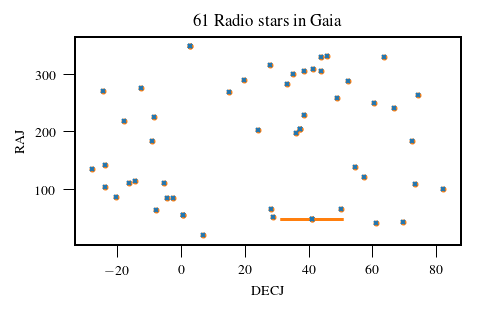

In [23]:
plt.figure()
plt.errorbar(Gdec_col, Gra_col, xerr=Gdec_err, yerr=Gra_err, fmt='o', color = "C1")
plt.errorbar(dec_col, ra_col, xerr=dec_err, yerr=ra_err, fmt='x', color="C0")


plt.xlabel("DECJ")
plt.ylabel("RAJ")
plt.tight_layout()
plt.title("61 Radio stars in Gaia")
#plt.xlim(-20,-20.5)
#plt.ylim(90,105)
#plt.savefig("xmatched_radioStars.pdf")

In [ ]:
#NB star with large error bars has no parallax measurement.

In [24]:
def ang_dist(alpha1, alpha2, delta1, delta2):
    """
    RA (alpha) and DEC (delta) are both in radians.
    returns angular distance in arcseconds.
    """
    alpha1 = alpha1*pi/180
    alpha2 = alpha2*pi/180
    delta1 = delta1*pi/180
    delta2 = delta2*pi/180

    arg = sin(delta1)*sin(delta2)+cos(delta1)*cos(delta2)*cos(alpha1-alpha2)
    theta = arccos(arg)*180/pi*3600
    return theta


In [25]:
ang_dist(19.229407, 19.23003292458, 6.811601, 6.81179337307)

2.3421505198267427

In [26]:
theta_lst=[]

In [27]:
for x in range(len(ra_col)):
    theta_lst.append(ang_dist(ra_col[x], Gra_col[x], dec_col[x], Gdec_col[x]))

In [28]:
frac_diff = (theta_lst - theta_col)/theta_col

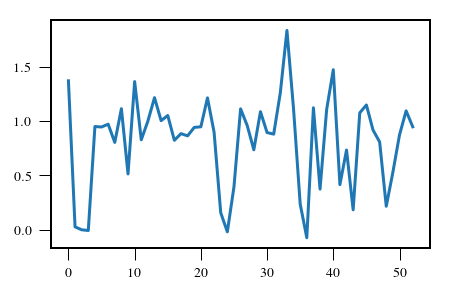

In [29]:
plt.plot(frac_diff)

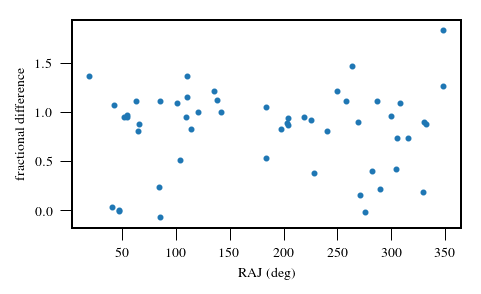

In [30]:
plt.scatter(ra_col, frac_diff)
plt.xlabel("RAJ (deg)")
plt.ylabel("fractional difference")
plt.tight_layout()
#plt.savefig("frac_diff_RAJ.pdf")

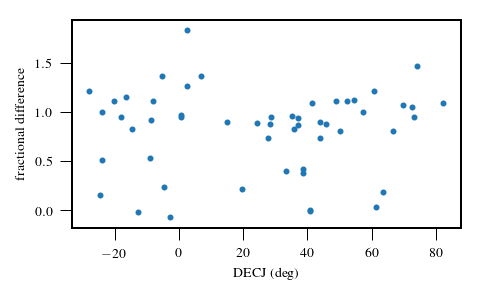

In [31]:
plt.scatter(dec_col, frac_diff)
plt.xlabel("DECJ (deg)")
plt.ylabel("fractional difference")
plt.tight_layout()
#plt.savefig("frac_diff_DEC.pdf")

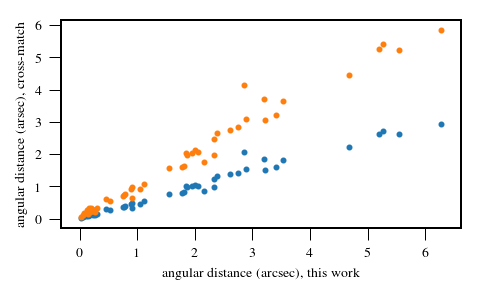

In [35]:
plt.scatter(theta_lst, theta_col)
plt.scatter(theta_lst, gline, color = "C1")
plt.xlabel(r"angular distance (arcsec), this work")
plt.ylabel(r"angular distance (arsec), cross-match")
plt.tight_layout()
#plt.savefig("frac_diff_usVsXmatch.pdf")

/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


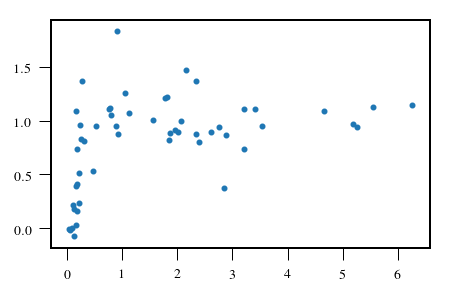

In [92]:
plt.scatter(theta_lst, frac_diff)

(array([ 5.,  4.,  3.,  2.,  9., 14., 12.,  2.,  1.,  1.]),
 array([-0.0736883 ,  0.11701857,  0.30772545,  0.49843232,  0.68913919,
         0.87984607,  1.07055294,  1.26125981,  1.45196668,  1.64267356,
         1.83338043]),
 <a list of 10 Patch objects>)

/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


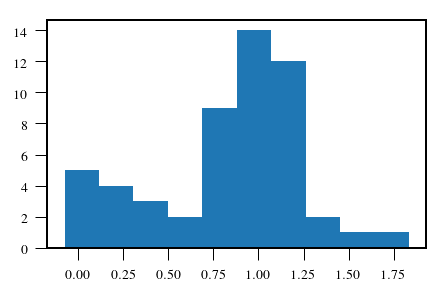

In [93]:
plt.hist(frac_diff)

# J1955+2908

In [ ]:
# GAIA theta = 0.153068
# dist = 1739.64867812642

In [ ]:
semi_a(0.116353,3.532103245563161*1000) # size of semimajor axis in AU based on pulsar distance (DM) and theta from GAIA

In [ ]:
kep_a(117,1.5)

In [ ]:
# parallax and error are 0.6034, 0.1942
d_est = 1/0.6034

In [ ]:
sigma_d = (1/0.1942)/d_est**2 

In [ ]:
sigma_d 

In [ ]:
d_est + sigma_d

# J1012+5307

In [ ]:
semi_a(0.071544965,0.734400211678976)

In [ ]:
kep_a(0.6,1.5)

# J0437-4715

In [ ]:
semi_a(0.071544965,0.121088886192142)

In [ ]:
kep_a(5.7,1.5)

# J1744-1134

In [ ]:
semi_a(1.971,3.18833137078074) 

In [ ]:
kep_P(6,1.6) # days

In [ ]:
kep_P(6,1.6)/365 # years

In [ ]:
# Could be in a 4,000 day orbit.

# J1843-1113

In [ ]:
t2 = semi_a(1.485199,2.84349320264736)

In [ ]:
t2

In [ ]:
kep_P(t2,1.6) # days 

In [ ]:
kep_P(t2,1.6)/365 # years

In [ ]:
# Could be in a 2,500 day orbit. Need to follow up with GAIA data parallax measurements

# J1939+2134

In [ ]:
t1939 = semi_a(2.138534,4.77262010957524)

In [ ]:
kep_P(t1939,1.6) # days

In [ ]:
kep_P(t1939,1.6)/365 # years

# J1910+1256

In [ ]:
t1910 = semi_a(2.138534/7218, 4.77262010957524)

In [ ]:
kep_a(t1910,1.5)

In [ ]:
t1910

In [ ]:
# So if I need to divide 1910 by 7200, and 1955 by 412, what is correct for 1910??

In [ ]:
# Could be in ~1,000 - 30,000 year orbit or longer